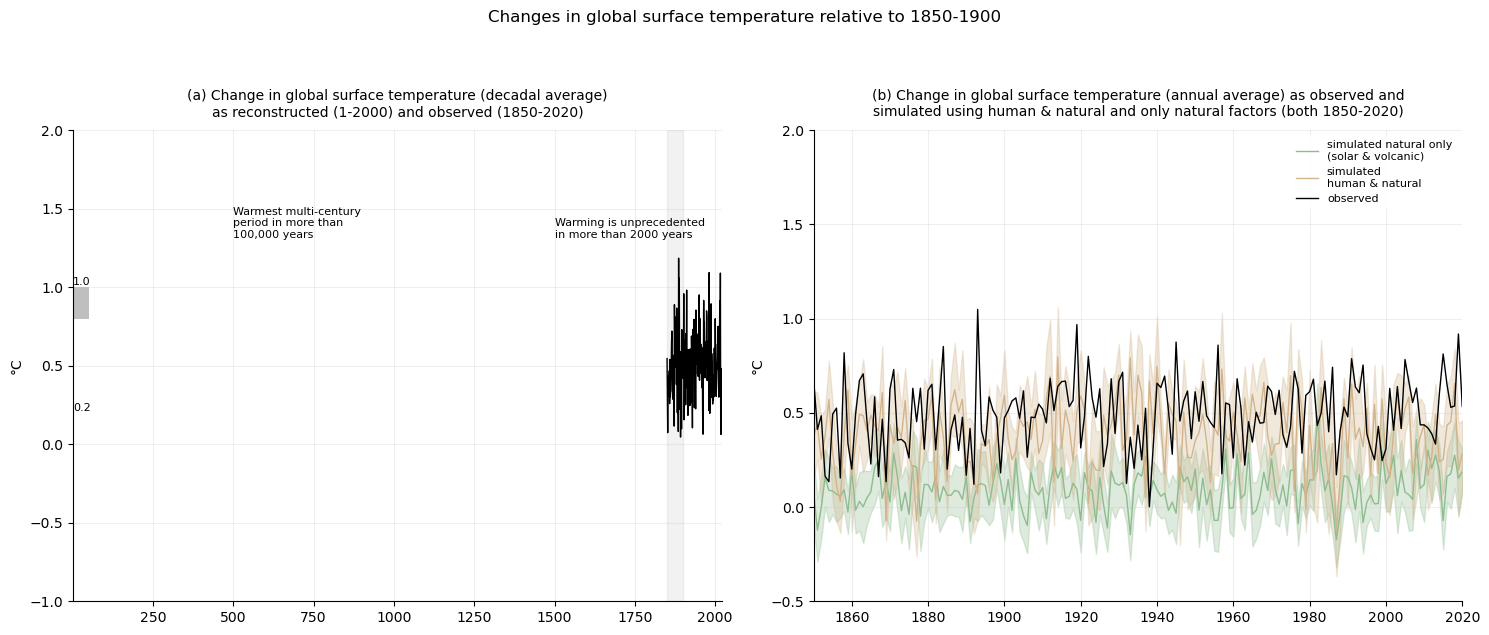

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def load_reconstruction_data(filepath):
    """
    Load reconstruction data from CSV file with metadata header
    Handles different encodings
    """
    # Try different encodings
    encodings = ['latin1', 'windows-1252', 'iso-8859-1']
    
    for encoding in encodings:
        try:
            # First read all lines to find where data starts
            with open(filepath, 'r', encoding=encoding) as f:
                lines = f.readlines()
                # Find where the data starts
                data_start = 0
                for i, line in enumerate(lines):
                    if line.strip() == 'data,,,,':
                        data_start = i
                        break
            
            # Read the CSV starting from the data section
            df = pd.read_csv(filepath, 
                           skiprows=data_start+2,  # Skip metadata + header row
                           names=['year', 'temp', 'p5', 'p95'],
                           encoding=encoding)
            return df
            
        except UnicodeDecodeError:
            continue
    
    raise ValueError("Could not read file with any of the attempted encodings")

# Define colors to match the original figure
RECONSTRUCTED_COLOR = '#808080'  # Gray
OBSERVED_COLOR = 'black'
HUMAN_NATURAL_COLOR = '#D2B48C'  # Tan/brown
NATURAL_ONLY_COLOR = '#8FBC8F'   # Sage green

# Set the style
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.color'] = '#CCCCCC'
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

def plot_panel_a(ax, recon_data_path):
    # Load reconstruction data
    recon_data = load_reconstruction_data(recon_data_path)
    
    # Sort data by year (as the sample shows reverse order)
    recon_data = recon_data.sort_values('year')
    
    # Plot reconstructed data with uncertainty
    ax.fill_between(recon_data['year'], 
                   recon_data['p5'],
                   recon_data['p95'],
                   color=RECONSTRUCTED_COLOR, alpha=0.3, label='_nolegend_')
    ax.plot(recon_data['year'], recon_data['temp'], 
            color=RECONSTRUCTED_COLOR, label='reconstructed', 
            linewidth=1, alpha=0.7)
    
    # Placeholder for observed data (replace with actual data when available)
    obs_years = np.linspace(1850, 2020, 171)
    obs_temp = np.random.normal(0.5, 0.2, 171)
    ax.plot(obs_years, obs_temp, 
            color=OBSERVED_COLOR, label='observed', 
            linewidth=1)
    
    # Styling
    ax.set_xlim(1, 2020)
    ax.set_ylim(-1, 2)
    ax.set_ylabel('°C', fontsize=10)
    
    # Add annotations
    ax.text(500, 1.3, 'Warmest multi-century\nperiod in more than\n100,000 years', 
            fontsize=8, ha='left', va='bottom')
    ax.text(1500, 1.3, 'Warming is unprecedented\nin more than 2000 years', 
            fontsize=8, ha='left', va='bottom')
    
    # Add reference period bar
    ax.add_patch(plt.Rectangle((1, 0.8), 50, 0.2, 
                              facecolor=RECONSTRUCTED_COLOR, alpha=0.5))
    ax.text(1, 1.0, '1.0', fontsize=8, ha='left', va='bottom')
    ax.text(1, 0.2, '0.2', fontsize=8, ha='left', va='bottom')
    
    # Add gray box for 1850-1900 reference period
    ax.axvspan(1850, 1900, color='gray', alpha=0.1)

def plot_panel_b(ax):
    # Placeholder for model data (replace with actual data when available)
    years = np.linspace(1850, 2020, 171)
    model_obs_data = pd.DataFrame({
        'year': years,
        'observed': np.random.normal(0.5, 0.2, 171),
        'human_natural': np.random.normal(0.4, 0.2, 171),
        'natural_only': np.random.normal(0.1, 0.1, 171),
        'hn_uncertainty': np.random.uniform(0.1, 0.3, 171),
        'n_uncertainty': np.random.uniform(0.1, 0.2, 171)
    })
    
    # Plot natural only with uncertainty
    ax.fill_between(model_obs_data['year'],
                   model_obs_data['natural_only'] - model_obs_data['n_uncertainty'],
                   model_obs_data['natural_only'] + model_obs_data['n_uncertainty'],
                   color=NATURAL_ONLY_COLOR, alpha=0.3, label='_nolegend_')
    ax.plot(model_obs_data['year'], model_obs_data['natural_only'],
            color=NATURAL_ONLY_COLOR, 
            label='simulated natural only\n(solar & volcanic)', 
            linewidth=1)
    
    # Plot human & natural with uncertainty
    ax.fill_between(model_obs_data['year'],
                   model_obs_data['human_natural'] - model_obs_data['hn_uncertainty'],
                   model_obs_data['human_natural'] + model_obs_data['hn_uncertainty'],
                   color=HUMAN_NATURAL_COLOR, alpha=0.3, label='_nolegend_')
    ax.plot(model_obs_data['year'], model_obs_data['human_natural'],
            color=HUMAN_NATURAL_COLOR, 
            label='simulated\nhuman & natural', 
            linewidth=1)
    
    # Plot observed data
    ax.plot(model_obs_data['year'], model_obs_data['observed'],
            color=OBSERVED_COLOR, label='observed', linewidth=1)
    
    # Styling
    ax.set_xlim(1850, 2020)
    ax.set_ylim(-0.5, 2)
    ax.set_ylabel('°C', fontsize=10)
    
    # Customize legend
    legend = ax.legend(loc='upper right', fontsize=8, frameon=True)
    legend.get_frame().set_alpha(0.9)
    legend.get_frame().set_edgecolor('none')

# Create the plots
recon_data_path = '../badc/ar6_wg1/data/spm/spm_01/v20221116/panel_a/SPM1_1-2000_recon.csv'  # Replace with actual path
plot_panel_a(ax1, recon_data_path)
plot_panel_b(ax2)

# Overall figure styling
fig.suptitle('Changes in global surface temperature relative to 1850-1900', 
            fontsize=12, y=1.05)

# Add subplot titles
ax1.set_title('(a) Change in global surface temperature (decadal average)\n' +
              'as reconstructed (1-2000) and observed (1850-2020)', 
              fontsize=10, pad=10)
ax2.set_title('(b) Change in global surface temperature (annual average) as observed and\n' +
              'simulated using human & natural and only natural factors (both 1850-2020)', 
              fontsize=10, pad=10)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Save the figure
plt.savefig('../output_figure/climate_change_visualization.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white',
            edgecolor='none')
plt.show()

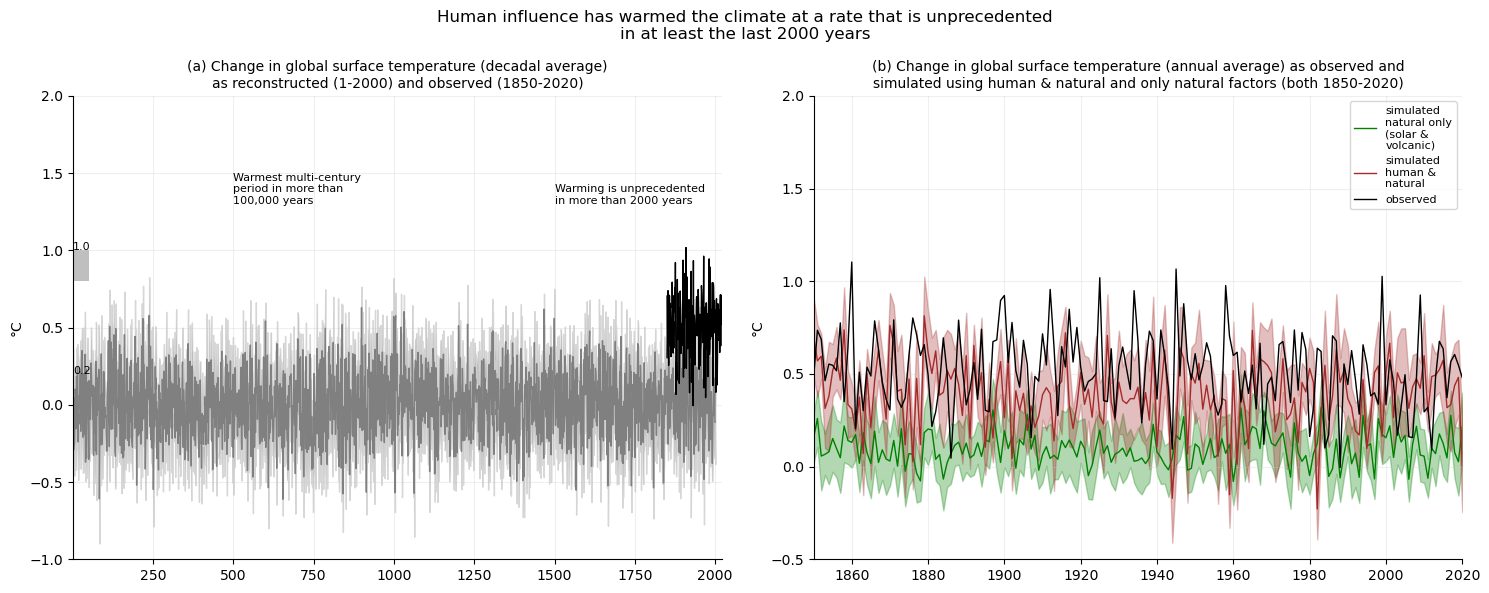

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to read and process data
def load_data(filepath):
    return pd.read_csv(filepath)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot Panel A
def plot_panel_a(ax):
    # Assuming data is loaded into DataFrames
    # Replace these with your actual data loading
    recon_data = pd.DataFrame({
        'year': np.linspace(1, 2000, 2000),
        'temp': np.random.normal(0, 0.2, 2000),
        'uncertainty': np.random.uniform(0.1, 0.3, 2000)
    })
    
    obs_data = pd.DataFrame({
        'year': np.linspace(1850, 2020, 171),
        'temp': np.random.normal(0.5, 0.2, 171)
    })
    
    # Plot reconstructed data with uncertainty
    ax.fill_between(recon_data['year'], 
                   recon_data['temp'] - recon_data['uncertainty'],
                   recon_data['temp'] + recon_data['uncertainty'],
                   color='gray', alpha=0.3)
    ax.plot(recon_data['year'], recon_data['temp'], color='gray', 
            label='reconstructed', linewidth=1)
    
    # Plot observed data
    ax.plot(obs_data['year'], obs_data['temp'], color='black', 
            label='observed', linewidth=1)
    
    # Styling
    ax.set_xlim(1, 2020)
    ax.set_ylim(-1, 2)
    ax.set_ylabel('°C')
    ax.grid(True, alpha=0.3)
    ax.text(500, 1.3, 'Warmest multi-century\nperiod in more than\n100,000 years', 
            fontsize=8)
    ax.text(1500, 1.3, 'Warming is unprecedented\nin more than 2000 years', 
            fontsize=8)
    
    # Add reference period bar
    ax.add_patch(plt.Rectangle((1, 0.8), 50, 0.2, 
                              facecolor='gray', alpha=0.5))
    ax.text(1, 1.0, '1.0', fontsize=8)
    ax.text(1, 0.2, '0.2', fontsize=8)

# Plot Panel B
def plot_panel_b(ax):
    # Assuming data is loaded into DataFrame
    model_obs_data = pd.DataFrame({
        'year': np.linspace(1850, 2020, 171),
        'observed': np.random.normal(0.5, 0.2, 171),
        'human_natural': np.random.normal(0.4, 0.2, 171),
        'natural_only': np.random.normal(0.1, 0.1, 171),
        'hn_uncertainty': np.random.uniform(0.1, 0.3, 171),
        'n_uncertainty': np.random.uniform(0.1, 0.2, 171)
    })
    
    # Plot natural only with uncertainty
    ax.fill_between(model_obs_data['year'],
                   model_obs_data['natural_only'] - model_obs_data['n_uncertainty'],
                   model_obs_data['natural_only'] + model_obs_data['n_uncertainty'],
                   color='green', alpha=0.3)
    ax.plot(model_obs_data['year'], model_obs_data['natural_only'],
            color='green', label='simulated\nnatural only\n(solar &\nvolcanic)', 
            linewidth=1)
    
    # Plot human & natural with uncertainty
    ax.fill_between(model_obs_data['year'],
                   model_obs_data['human_natural'] - model_obs_data['hn_uncertainty'],
                   model_obs_data['human_natural'] + model_obs_data['hn_uncertainty'],
                   color='brown', alpha=0.3)
    ax.plot(model_obs_data['year'], model_obs_data['human_natural'],
            color='brown', label='simulated\nhuman &\nnatural', linewidth=1)
    
    # Plot observed data
    ax.plot(model_obs_data['year'], model_obs_data['observed'],
            color='black', label='observed', linewidth=1)
    
    # Styling
    ax.set_xlim(1850, 2020)
    ax.set_ylim(-0.5, 2)
    ax.set_ylabel('°C')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right', fontsize=8)

# Create the plots
plot_panel_a(ax1)
plot_panel_b(ax2)

# Overall figure styling
plt.suptitle('Human influence has warmed the climate at a rate that is unprecedented\n' +
            'in at least the last 2000 years', fontsize=12)

# Add subplot titles
ax1.set_title('(a) Change in global surface temperature (decadal average)\n' +
              'as reconstructed (1-2000) and observed (1850-2020)', 
              fontsize=10)
ax2.set_title('(b) Change in global surface temperature (annual average) as observed and\n' +
              'simulated using human & natural and only natural factors (both 1850-2020)', 
              fontsize=10)

# Adjust layout
plt.tight_layout()

# Save the figure
# plt.savefig('climate_change_visualization.png', dpi=300, bbox_inches='tight')
plt.show()